# Cyberbullying Filter

In [1]:
import pandas as pd
import os
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

import string
import nltk
from nltk import word_tokenize          
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

import emoji
import numpy as np

ModuleNotFoundError: No module named 'wordcloud'

## Preparing The Data

_data.csv_ is the labelled cyberbully data from http://research.cs.wisc.edu/bullying/data.html

_tweets.csv_ is the raw tweet data from twitter.com.

In [ ]:
tweet = pd.read_csv("tweet.csv")
data  = pd.read_csv("data.csv")
print("The number of tweets in tweet.csv is ", tweet.tweet_id.nunique())
print("The number of tweets in data.csv is ", data.tweet_id.nunique())

allTweets = pd.merge(tweet, data, on='tweet_id')
print("The number of merged tweets (training set) is ", allTweets.tweet_id.nunique())

allTweets = allTweets[['tweet_id','tweet','flag']]
bullyTweets = allTweets.loc[allTweets["flag"] == "y"] 
noBullyTweets = allTweets.loc[allTweets["flag"] == "n"] 
print("The total number of tweets is ", allTweets.tweet_id.nunique())
print("The number of bully flag tweets (flag == y) is ", bullyTweets.tweet_id.nunique())
print("The number of non bullying tweets (flag == n) is ", noBullyTweets.tweet_id.nunique())

### A Quick Sample of the Data:

In [2]:
pd.options.display.max_rows
pd.set_option('display.max_colwidth', -1)
bullyTweets.head(20)

NameError: name 'bullyTweets' is not defined

In [3]:
noBullyTweets.head(20)

NameError: name 'noBullyTweets' is not defined

## Dictionary Creation
Creates a function that uses  alist and empty dictionary to return a dictionary of all the words and their frequencies from the tweets, sorted by their frequencies.

In [21]:
# supporting functions

def tokenize(text):
    tokens = [i.strip() for i in text if i not in string.punctuation if i not in emoji.UNICODE_EMOJI]
    return "".join(tokens)

stopwordSet = set(stopwords.words("english"))
def word_filter(word):
    # strip
    word = word.strip().lower()
    word = tokenize(word.strip(string.punctuation))
    if word == "":
        return False, None
    # get rid of mentions (@USERNAME)
    if word[0] == "@":
        return False, None
    
    # get rid of stopwords
    elif (word in stopwordSet):
        return False, None
    
    # get rid of emojis
    elif word in emoji.UNICODE_EMOJI:
        return False, None
    return True, word

word_filter("'it'")

(False, None)

~~~

In [22]:
def dictionary_creation(tweetLst, bullyVocab):
    for tweet in tweetLst:
        for word in tweet.split():
            flag, resultWord = word_filter(word)

            if flag:
                if(resultWord == "it"):
                    print(flag, resultWord)
                # check if in bullyVocab
                if resultWord in bullyVocab:
                    bullyVocab[resultWord] += 1
                else:
                    bullyVocab[resultWord] = 1
    bullyVocab = sorted(bullyVocab.items(), key = lambda kv: kv[1], reverse = True)
    return bullyVocab

In [23]:
def bar_graph(bullyVocab, number):
    # create a bar graph of the bullyVocab data
    words = [i[0] for i in bullyVocab if not i[0] == ""]
    topNWords = words[:number]

    y_pos = np.arange(len(topNWords))
    frequency = [i[1] for i in bullyVocab if not i[0] == ""]
    topNFrequency = frequency[:number]
    
    plt.figure(figsize = (15, 7))

    plt.bar(y_pos, topNFrequency, align = 'center')
    plt.xticks(y_pos, topNWords)
    plt.xticks(rotation = 50)
    plt.xlabel("Word")
    plt.ylabel("Frequency")
    plt.show()

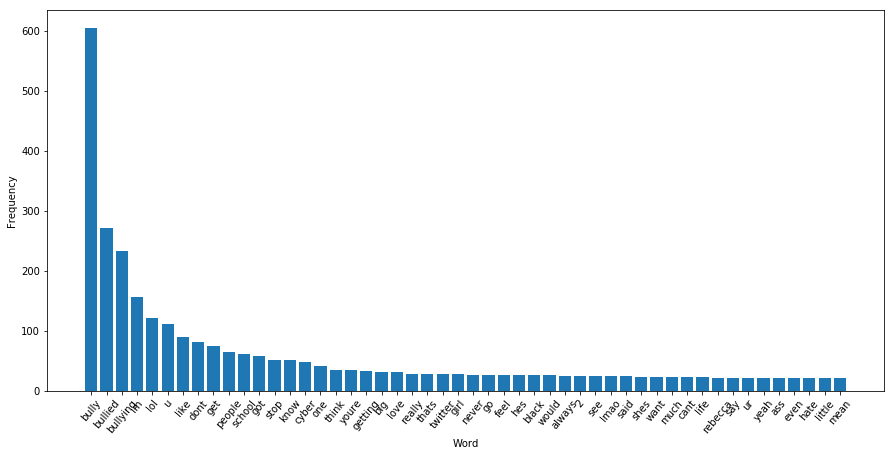

In [24]:
bullyTweetLst = bullyTweets["tweet"].tolist()

bullyVocab = {}
dictionary_creation(bullyTweetLst, bullyVocab)

# sort the dictionary by the words with the highest frequency                
bullyVocab = sorted(bullyVocab.items(), key = lambda kv: kv[1], reverse = True)

bar_graph(bullyVocab, 50)

## Word Clouds

Generating wordclouds based on frequencies!

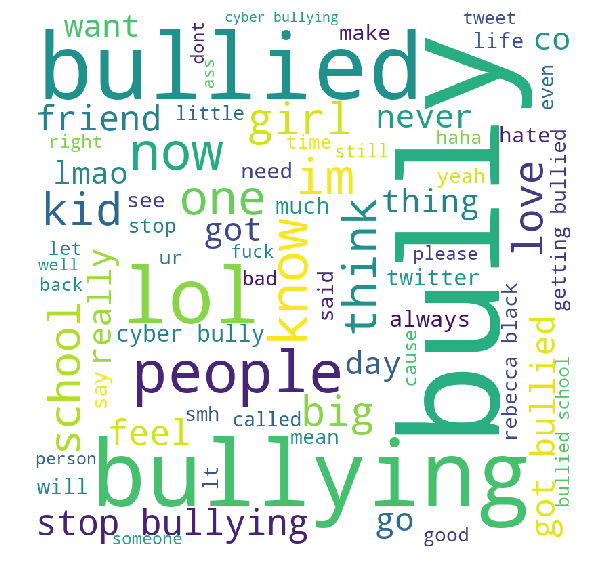

In [175]:
comment_words = " "
comment_words2 = " "

def generate_wordcloud(tweets, comment_words, fontsize):
    for val in tweets.tweet:
        val = str(val)
        words = val.split()
        for i in range(len(words)):
            words[i] = words[i].lower()
            
        for word in words:
            comment_words = comment_words + word + " "
            
    # actual cloud
    wordcloud = WordCloud(width = 800, height = 800, background_color = 'white',
                          stopwords = set(STOPWORDS), min_font_size = fontsize).generate(comment_words)

    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0.5)
    plt.show()

generate_wordcloud(bullyTweets, comment_words, 20)

# generate_wordcloud(noBullyTweets, comment_words2, 20)

In [176]:
def img_wordcloud(tweets, image, comment_words):
    mask = np.array(open(image))
    wordcloud = Wordcloud(stopwords = stopwords, background_color = "white", mode = "RGBA",
                         max_words = 1000, mask = mask).generate(tweets)
    
    # colors
    image_colors = ImageColorGenerator(mask)
    plt.figure(figsize = [8, 8])
    plt.imshow(wordcloud_usa.recolor(color_func=image_colors), interpolation = "bilinear")
    plt.axis("off")
    
    plt.show()
    
#img_wordcloud(bullyTweets, "![image.png](attachment:image.png)", comment_words)


In [177]:
input_data = allTweets
label_data = allTweets['flag'] 
target = np.array(label_data)

type(input_data)

pandas.core.frame.DataFrame

In [201]:
indices = numpy.random.permutation(allTweets.shape[0])
ninety = int(.90 * len(indices))
training_idx, test_idx = indices[:ninety], indices[ninety:]

training, test = input_data.loc[training_idx,"tweet":"flag"], input_data.loc[test_idx,"tweet":"flag"]

training_data = training['tweet'].tolist()
training_label= training['flag']

test_data = test['tweet'].tolist()
test_label= test['flag'].tolist()

In [202]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(training_data)
X_train_counts.shape

(1646, 5781)

In [203]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(1646, 5781)

In [204]:
# Machine Learning
# Training Naive Bayes (NB) classifier on training data.
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, training_label)

In [205]:
# Building a pipeline: We can write less code and do all of the above, by building a pipeline as follows:
# The names ‘vect’ , ‘tfidf’ and ‘clf’ are arbitrary but will be used later.
# We will be using the 'text_clf' going forward.
from sklearn.pipeline import Pipeline

text_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])
text_clf = text_clf.fit(training_data, training_label)

In [206]:
# Performance of NB Classifier
import numpy as np
predicted = text_clf.predict(test_data)
np.mean(predicted == test_label)

0.5901639344262295

In [210]:
# Training Support Vector Machines - SVM and calculating its performance
from sklearn.linear_model import SGDClassifier
text_clf_svm = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                         ('clf-svm', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, max_iter=1000, tol = 0.19, random_state=42))])

text_clf_svm = text_clf_svm.fit(training_data, training_label)
predicted_svm = text_clf_svm.predict(test_data)
np.mean(predicted_svm == test_label)

0.6029143897996357